In [1]:
%cd ../..

/home/work/AnacondaProjects/combinators


In [2]:
import logging

import numpy as np
import probtorch
import torch

from combinators.inference import importance, mcmc
from combinators.kernel import kernel, mh
from combinators import utils

In [3]:
import examples.fep_agent.fep_agent as fep_agent

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
agent = fep_agent.FepAgent(batch_shape=(100,), trainable=False)

03/21/2019 17:51:15 ELBO=-1.36372900e+00 at epoch 1
03/21/2019 17:51:15 ELBO=-3.48115945e+00 at epoch 2
03/21/2019 17:51:15 ELBO=-3.30605721e+00 at epoch 3
03/21/2019 17:51:15 ELBO=-1.83763921e+00 at epoch 4
03/21/2019 17:51:15 ELBO=-2.11924982e+00 at epoch 5
03/21/2019 17:51:15 ELBO=-1.56076860e+00 at epoch 6
03/21/2019 17:51:15 ELBO=-1.33997953e+00 at epoch 7
03/21/2019 17:51:15 ELBO=-1.50829053e+00 at epoch 8
03/21/2019 17:51:15 ELBO=-1.46032381e+00 at epoch 9
03/21/2019 17:51:15 ELBO=-1.45142472e+00 at epoch 10
03/21/2019 17:51:15 ELBO=-1.41267681e+00 at epoch 11
03/21/2019 17:51:15 ELBO=-1.37739825e+00 at epoch 12
03/21/2019 17:51:15 ELBO=-1.38261580e+00 at epoch 13
03/21/2019 17:51:15 ELBO=-1.41949642e+00 at epoch 14
03/21/2019 17:51:15 ELBO=-1.42026246e+00 at epoch 15
03/21/2019 17:51:15 ELBO=-1.36471379e+00 at epoch 16
03/21/2019 17:51:15 ELBO=-1.42582798e+00 at epoch 17
03/21/2019 17:51:15 ELBO=-1.42199337e+00 at epoch 18
03/21/2019 17:51:15 ELBO=-1.34324050e+00 at epoch 19
03

Epoch   206: reducing learning rate of group 0 to 5.0000e-02.


03/21/2019 17:51:21 ELBO=-1.38530970e+00 at epoch 215
03/21/2019 17:51:21 ELBO=-1.36324418e+00 at epoch 216
03/21/2019 17:51:21 ELBO=-1.39561701e+00 at epoch 217
03/21/2019 17:51:21 ELBO=-1.38092864e+00 at epoch 218
03/21/2019 17:51:21 ELBO=-1.34076703e+00 at epoch 219
03/21/2019 17:51:21 ELBO=-1.39716566e+00 at epoch 220
03/21/2019 17:51:21 ELBO=-1.35203815e+00 at epoch 221
03/21/2019 17:51:21 ELBO=-1.41174114e+00 at epoch 222
03/21/2019 17:51:21 ELBO=-1.37607634e+00 at epoch 223
03/21/2019 17:51:21 ELBO=-1.41015279e+00 at epoch 224
03/21/2019 17:51:21 ELBO=-1.39843929e+00 at epoch 225
03/21/2019 17:51:21 ELBO=-1.38617992e+00 at epoch 226
03/21/2019 17:51:21 ELBO=-1.38066876e+00 at epoch 227
03/21/2019 17:51:21 ELBO=-1.39292645e+00 at epoch 228
03/21/2019 17:51:21 ELBO=-1.38712764e+00 at epoch 229
03/21/2019 17:51:21 ELBO=-1.35770464e+00 at epoch 230
03/21/2019 17:51:21 ELBO=-1.37240124e+00 at epoch 231
03/21/2019 17:51:21 ELBO=-1.39573550e+00 at epoch 232
03/21/2019 17:51:21 ELBO=-1.

Epoch   307: reducing learning rate of group 0 to 2.5000e-02.


03/21/2019 17:51:24 ELBO=-1.36368012e+00 at epoch 317
03/21/2019 17:51:24 ELBO=-1.42722178e+00 at epoch 318
03/21/2019 17:51:24 ELBO=-1.41467679e+00 at epoch 319
03/21/2019 17:51:24 ELBO=-1.41942918e+00 at epoch 320
03/21/2019 17:51:24 ELBO=-1.36516333e+00 at epoch 321
03/21/2019 17:51:24 ELBO=-1.42732942e+00 at epoch 322
03/21/2019 17:51:24 ELBO=-1.40839171e+00 at epoch 323
03/21/2019 17:51:24 ELBO=-1.39718723e+00 at epoch 324
03/21/2019 17:51:24 ELBO=-1.38406515e+00 at epoch 325
03/21/2019 17:51:24 ELBO=-1.39711094e+00 at epoch 326
03/21/2019 17:51:24 ELBO=-1.41379130e+00 at epoch 327
03/21/2019 17:51:24 ELBO=-1.38952053e+00 at epoch 328
03/21/2019 17:51:24 ELBO=-1.36516452e+00 at epoch 329
03/21/2019 17:51:24 ELBO=-1.38020229e+00 at epoch 330
03/21/2019 17:51:24 ELBO=-1.38658738e+00 at epoch 331
03/21/2019 17:51:24 ELBO=-1.38810730e+00 at epoch 332
03/21/2019 17:51:24 ELBO=-1.35306370e+00 at epoch 333
03/21/2019 17:51:24 ELBO=-1.40336072e+00 at epoch 334
03/21/2019 17:51:24 ELBO=-1.

Epoch   408: reducing learning rate of group 0 to 1.2500e-02.


03/21/2019 17:51:27 ELBO=-1.39331114e+00 at epoch 417
03/21/2019 17:51:27 ELBO=-1.37679780e+00 at epoch 418
03/21/2019 17:51:27 ELBO=-1.36328661e+00 at epoch 419
03/21/2019 17:51:27 ELBO=-1.36431468e+00 at epoch 420
03/21/2019 17:51:27 ELBO=-1.40616608e+00 at epoch 421
03/21/2019 17:51:27 ELBO=-1.38179624e+00 at epoch 422
03/21/2019 17:51:27 ELBO=-1.38542497e+00 at epoch 423
03/21/2019 17:51:27 ELBO=-1.38264191e+00 at epoch 424
03/21/2019 17:51:27 ELBO=-1.34696400e+00 at epoch 425
03/21/2019 17:51:27 ELBO=-1.33640456e+00 at epoch 426
03/21/2019 17:51:27 ELBO=-1.36938930e+00 at epoch 427
03/21/2019 17:51:27 ELBO=-1.38333631e+00 at epoch 428
03/21/2019 17:51:27 ELBO=-1.35707617e+00 at epoch 429
03/21/2019 17:51:27 ELBO=-1.39839375e+00 at epoch 430
03/21/2019 17:51:27 ELBO=-1.40957260e+00 at epoch 431
03/21/2019 17:51:27 ELBO=-1.35588634e+00 at epoch 432
03/21/2019 17:51:27 ELBO=-1.36686218e+00 at epoch 433
03/21/2019 17:51:27 ELBO=-1.35401464e+00 at epoch 434
03/21/2019 17:51:27 ELBO=-1.

Epoch   719: reducing learning rate of group 0 to 6.2500e-03.


03/21/2019 17:51:36 ELBO=-1.28968048e+00 at epoch 728
03/21/2019 17:51:36 ELBO=-1.26436973e+00 at epoch 729
03/21/2019 17:51:36 ELBO=-1.26248658e+00 at epoch 730
03/21/2019 17:51:36 ELBO=-1.26092672e+00 at epoch 731
03/21/2019 17:51:36 ELBO=-1.27829397e+00 at epoch 732
03/21/2019 17:51:36 ELBO=-1.26839709e+00 at epoch 733
03/21/2019 17:51:36 ELBO=-1.29858363e+00 at epoch 734
03/21/2019 17:51:36 ELBO=-1.26924288e+00 at epoch 735
03/21/2019 17:51:36 ELBO=-1.26347005e+00 at epoch 736
03/21/2019 17:51:36 ELBO=-1.26676464e+00 at epoch 737
03/21/2019 17:51:36 ELBO=-1.27851748e+00 at epoch 738
03/21/2019 17:51:36 ELBO=-1.28328598e+00 at epoch 739
03/21/2019 17:51:36 ELBO=-1.26850581e+00 at epoch 740
03/21/2019 17:51:36 ELBO=-1.29778183e+00 at epoch 741
03/21/2019 17:51:36 ELBO=-1.25641298e+00 at epoch 742
03/21/2019 17:51:36 ELBO=-1.29046643e+00 at epoch 743
03/21/2019 17:51:36 ELBO=-1.27079427e+00 at epoch 744
03/21/2019 17:51:36 ELBO=-1.27774847e+00 at epoch 745
03/21/2019 17:51:36 ELBO=-1.

Epoch   856: reducing learning rate of group 0 to 3.1250e-03.


03/21/2019 17:51:40 ELBO=-1.29079533e+00 at epoch 865
03/21/2019 17:51:40 ELBO=-1.28455901e+00 at epoch 866
03/21/2019 17:51:40 ELBO=-1.28492749e+00 at epoch 867
03/21/2019 17:51:40 ELBO=-1.27649319e+00 at epoch 868
03/21/2019 17:51:40 ELBO=-1.28121018e+00 at epoch 869
03/21/2019 17:51:40 ELBO=-1.30853808e+00 at epoch 870
03/21/2019 17:51:40 ELBO=-1.28240430e+00 at epoch 871
03/21/2019 17:51:40 ELBO=-1.25645196e+00 at epoch 872
03/21/2019 17:51:40 ELBO=-1.27420282e+00 at epoch 873
03/21/2019 17:51:40 ELBO=-1.26365387e+00 at epoch 874
03/21/2019 17:51:40 ELBO=-1.26725698e+00 at epoch 875
03/21/2019 17:51:40 ELBO=-1.25864398e+00 at epoch 876
03/21/2019 17:51:40 ELBO=-1.28729343e+00 at epoch 877
03/21/2019 17:51:40 ELBO=-1.28895986e+00 at epoch 878
03/21/2019 17:51:40 ELBO=-1.26042151e+00 at epoch 879
03/21/2019 17:51:40 ELBO=-1.28225636e+00 at epoch 880
03/21/2019 17:51:40 ELBO=-1.26190186e+00 at epoch 881
03/21/2019 17:51:40 ELBO=-1.26332653e+00 at epoch 882
03/21/2019 17:51:40 ELBO=-1.

Epoch   957: reducing learning rate of group 0 to 1.5625e-03.


03/21/2019 17:51:42 ELBO=-1.26117551e+00 at epoch 965
03/21/2019 17:51:42 ELBO=-1.28630400e+00 at epoch 966
03/21/2019 17:51:42 ELBO=-1.27228236e+00 at epoch 967
03/21/2019 17:51:43 ELBO=-1.28449082e+00 at epoch 968
03/21/2019 17:51:43 ELBO=-1.28021789e+00 at epoch 969
03/21/2019 17:51:43 ELBO=-1.28692961e+00 at epoch 970
03/21/2019 17:51:43 ELBO=-1.28045177e+00 at epoch 971
03/21/2019 17:51:43 ELBO=-1.27976048e+00 at epoch 972
03/21/2019 17:51:43 ELBO=-1.28138661e+00 at epoch 973
03/21/2019 17:51:43 ELBO=-1.28313398e+00 at epoch 974
03/21/2019 17:51:43 ELBO=-1.28297162e+00 at epoch 975
03/21/2019 17:51:43 ELBO=-1.28592372e+00 at epoch 976
03/21/2019 17:51:43 ELBO=-1.28535426e+00 at epoch 977
03/21/2019 17:51:43 ELBO=-1.26914990e+00 at epoch 978
03/21/2019 17:51:43 ELBO=-1.27573061e+00 at epoch 979
03/21/2019 17:51:43 ELBO=-1.27736175e+00 at epoch 980
03/21/2019 17:51:43 ELBO=-1.27775335e+00 at epoch 981
03/21/2019 17:51:43 ELBO=-1.26574421e+00 at epoch 982
03/21/2019 17:51:43 ELBO=-1.

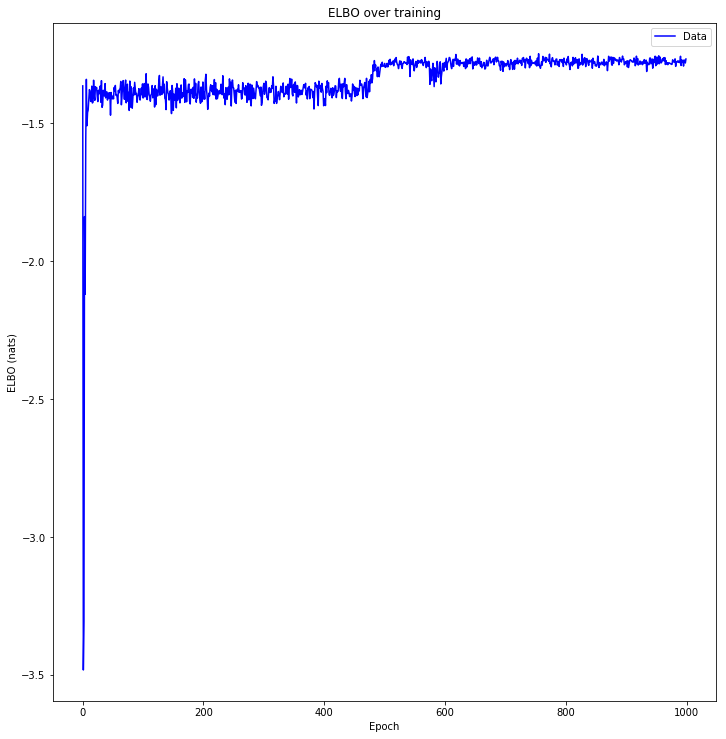

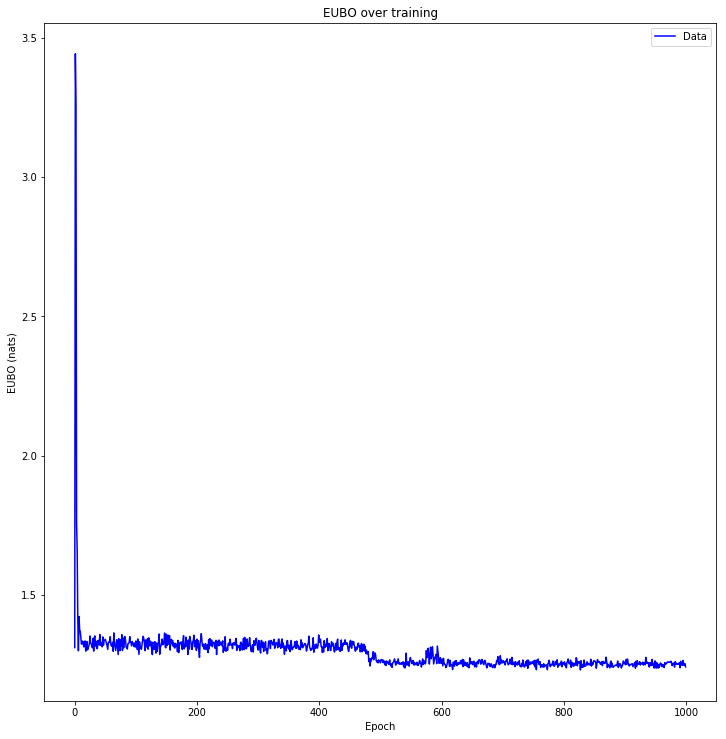

In [6]:
inference, trained_params, (elbos, eubos) = importance.variational_importance(
    agent, 1000, {},
    use_cuda=False, lr=1e-1, bound='elbo',
    patience=100,
)
utils.plot_evidence_bounds(elbos.detach().numpy(), True)
utils.plot_evidence_bounds(eubos.detach().numpy(), False)

In [7]:
trained_params

"{'foraging_success__probs': 'tensor([[1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01],\n        [1.0000e-06, 2.0000e-01]])', 'foraging_success__temperature': 'tensor([[1., 1.],\n        [1., 1.],\n        [1., 1.],\n        [1., 1.],\n        [1., 1.],\

In [8]:
inference

ComputationGraph{[('FepAgent', Trace{'foraging_success': RelaxedBernoulli([torch.FloatTensor of size 100x24x2]), 'survival_preference': RelaxedBernoulli([torch.FloatTensor of size 100x1]), 'meals': Normal([torch.FloatTensor of size 100x1])})]}

In [9]:
inference['FepAgent']['meals'].value.mean(dim=0)

tensor([2.9980], grad_fn=<MeanBackward0>)

In [10]:
agent = fep_agent.FepAgent(batch_shape=(100,), trainable=True)

03/21/2019 17:51:44 ELBO=-1.37764406e+00 at epoch 1
03/21/2019 17:51:44 ELBO=-3.66258383e+00 at epoch 2
03/21/2019 17:51:44 ELBO=-3.43147492e+00 at epoch 3
03/21/2019 17:51:44 ELBO=-2.52749944e+00 at epoch 4
03/21/2019 17:51:44 ELBO=-1.36914563e+00 at epoch 5
03/21/2019 17:51:44 ELBO=-2.60406494e+00 at epoch 6
03/21/2019 17:51:44 ELBO=-1.51468825e+00 at epoch 7
03/21/2019 17:51:44 ELBO=-1.53804576e+00 at epoch 8
03/21/2019 17:51:44 ELBO=-1.67051220e+00 at epoch 9
03/21/2019 17:51:44 ELBO=-1.62749469e+00 at epoch 10
03/21/2019 17:51:44 ELBO=-1.55143833e+00 at epoch 11
03/21/2019 17:51:44 ELBO=-1.51088560e+00 at epoch 12
03/21/2019 17:51:44 ELBO=-1.48265743e+00 at epoch 13
03/21/2019 17:51:44 ELBO=-1.49140763e+00 at epoch 14
03/21/2019 17:51:44 ELBO=-1.49889326e+00 at epoch 15
03/21/2019 17:51:44 ELBO=-1.52810824e+00 at epoch 16
03/21/2019 17:51:44 ELBO=-1.51207912e+00 at epoch 17
03/21/2019 17:51:44 ELBO=-1.49041593e+00 at epoch 18
03/21/2019 17:51:45 ELBO=-1.46713531e+00 at epoch 19
03

Epoch   245: reducing learning rate of group 0 to 5.0000e-02.


03/21/2019 17:51:53 ELBO=3.59548512e-03 at epoch 253
03/21/2019 17:51:53 ELBO=6.33070013e-03 at epoch 254
03/21/2019 17:51:53 ELBO=9.36078187e-03 at epoch 255
03/21/2019 17:51:53 ELBO=1.19884526e-02 at epoch 256
03/21/2019 17:51:53 ELBO=1.40149761e-02 at epoch 257
03/21/2019 17:51:53 ELBO=1.56197213e-02 at epoch 258
03/21/2019 17:51:53 ELBO=1.74472444e-02 at epoch 259
03/21/2019 17:51:53 ELBO=1.93359144e-02 at epoch 260
03/21/2019 17:51:53 ELBO=2.04876345e-02 at epoch 261
03/21/2019 17:51:53 ELBO=2.46848017e-02 at epoch 262
03/21/2019 17:51:53 ELBO=2.75095254e-02 at epoch 263
03/21/2019 17:51:53 ELBO=2.84603983e-02 at epoch 264
03/21/2019 17:51:53 ELBO=2.99708750e-02 at epoch 265
03/21/2019 17:51:54 ELBO=3.37226875e-02 at epoch 266
03/21/2019 17:51:54 ELBO=3.33934203e-02 at epoch 267
03/21/2019 17:51:54 ELBO=3.66703160e-02 at epoch 268
03/21/2019 17:51:54 ELBO=3.87426652e-02 at epoch 269
03/21/2019 17:51:54 ELBO=4.26523536e-02 at epoch 270
03/21/2019 17:51:54 ELBO=4.41582091e-02 at epo

Epoch   346: reducing learning rate of group 0 to 2.5000e-02.


03/21/2019 17:51:57 ELBO=2.37590790e-01 at epoch 354
03/21/2019 17:51:57 ELBO=2.37314701e-01 at epoch 355
03/21/2019 17:51:57 ELBO=2.39592284e-01 at epoch 356
03/21/2019 17:51:57 ELBO=2.41613537e-01 at epoch 357
03/21/2019 17:51:57 ELBO=2.41811603e-01 at epoch 358
03/21/2019 17:51:57 ELBO=2.43903562e-01 at epoch 359
03/21/2019 17:51:57 ELBO=2.45975077e-01 at epoch 360
03/21/2019 17:51:57 ELBO=2.49262065e-01 at epoch 361
03/21/2019 17:51:57 ELBO=2.50148743e-01 at epoch 362
03/21/2019 17:51:57 ELBO=2.50009447e-01 at epoch 363
03/21/2019 17:51:57 ELBO=2.51547575e-01 at epoch 364
03/21/2019 17:51:57 ELBO=2.52396107e-01 at epoch 365
03/21/2019 17:51:57 ELBO=2.54335046e-01 at epoch 366
03/21/2019 17:51:57 ELBO=2.55589932e-01 at epoch 367
03/21/2019 17:51:57 ELBO=2.59219885e-01 at epoch 368
03/21/2019 17:51:57 ELBO=2.59299845e-01 at epoch 369
03/21/2019 17:51:57 ELBO=2.58195519e-01 at epoch 370
03/21/2019 17:51:57 ELBO=2.60385543e-01 at epoch 371
03/21/2019 17:51:57 ELBO=2.62081176e-01 at epo

Epoch   447: reducing learning rate of group 0 to 1.2500e-02.


03/21/2019 17:52:00 ELBO=3.80714417e-01 at epoch 454
03/21/2019 17:52:00 ELBO=3.83161306e-01 at epoch 455
03/21/2019 17:52:00 ELBO=3.81593466e-01 at epoch 456
03/21/2019 17:52:00 ELBO=3.85337114e-01 at epoch 457
03/21/2019 17:52:00 ELBO=3.84201705e-01 at epoch 458
03/21/2019 17:52:00 ELBO=3.88452500e-01 at epoch 459
03/21/2019 17:52:00 ELBO=3.87446910e-01 at epoch 460
03/21/2019 17:52:00 ELBO=3.90028387e-01 at epoch 461
03/21/2019 17:52:00 ELBO=3.87645572e-01 at epoch 462
03/21/2019 17:52:00 ELBO=3.92558753e-01 at epoch 463
03/21/2019 17:52:00 ELBO=3.87068182e-01 at epoch 464
03/21/2019 17:52:00 ELBO=3.87078196e-01 at epoch 465
03/21/2019 17:52:00 ELBO=3.88931036e-01 at epoch 466
03/21/2019 17:52:00 ELBO=3.93805891e-01 at epoch 467
03/21/2019 17:52:00 ELBO=3.94213408e-01 at epoch 468
03/21/2019 17:52:01 ELBO=3.95286173e-01 at epoch 469
03/21/2019 17:52:01 ELBO=3.92196268e-01 at epoch 470
03/21/2019 17:52:01 ELBO=3.93459320e-01 at epoch 471
03/21/2019 17:52:01 ELBO=3.96689653e-01 at epo

Epoch   548: reducing learning rate of group 0 to 6.2500e-03.


03/21/2019 17:52:03 ELBO=4.68957454e-01 at epoch 554
03/21/2019 17:52:04 ELBO=4.66504544e-01 at epoch 555
03/21/2019 17:52:04 ELBO=4.65128362e-01 at epoch 556
03/21/2019 17:52:04 ELBO=4.67758626e-01 at epoch 557
03/21/2019 17:52:04 ELBO=4.66643363e-01 at epoch 558
03/21/2019 17:52:04 ELBO=4.67984557e-01 at epoch 559
03/21/2019 17:52:04 ELBO=4.71741110e-01 at epoch 560
03/21/2019 17:52:04 ELBO=4.70854223e-01 at epoch 561
03/21/2019 17:52:04 ELBO=4.69979256e-01 at epoch 562
03/21/2019 17:52:04 ELBO=4.70870525e-01 at epoch 563
03/21/2019 17:52:04 ELBO=4.71013874e-01 at epoch 564
03/21/2019 17:52:04 ELBO=4.70350921e-01 at epoch 565
03/21/2019 17:52:04 ELBO=4.72074866e-01 at epoch 566
03/21/2019 17:52:04 ELBO=4.68201548e-01 at epoch 567
03/21/2019 17:52:04 ELBO=4.73071188e-01 at epoch 568
03/21/2019 17:52:04 ELBO=4.73053634e-01 at epoch 569
03/21/2019 17:52:04 ELBO=4.76333171e-01 at epoch 570
03/21/2019 17:52:04 ELBO=4.73539114e-01 at epoch 571
03/21/2019 17:52:04 ELBO=4.70337301e-01 at epo

Epoch   649: reducing learning rate of group 0 to 3.1250e-03.


03/21/2019 17:52:09 ELBO=5.15039265e-01 at epoch 654
03/21/2019 17:52:09 ELBO=5.15948355e-01 at epoch 655
03/21/2019 17:52:09 ELBO=5.15341103e-01 at epoch 656
03/21/2019 17:52:09 ELBO=5.17134309e-01 at epoch 657
03/21/2019 17:52:09 ELBO=5.15516400e-01 at epoch 658
03/21/2019 17:52:09 ELBO=5.13005078e-01 at epoch 659
03/21/2019 17:52:09 ELBO=5.15239477e-01 at epoch 660
03/21/2019 17:52:09 ELBO=5.19434869e-01 at epoch 661
03/21/2019 17:52:09 ELBO=5.16649067e-01 at epoch 662
03/21/2019 17:52:09 ELBO=5.18985271e-01 at epoch 663
03/21/2019 17:52:09 ELBO=5.16994655e-01 at epoch 664
03/21/2019 17:52:09 ELBO=5.18952966e-01 at epoch 665
03/21/2019 17:52:09 ELBO=5.17560482e-01 at epoch 666
03/21/2019 17:52:09 ELBO=5.19238591e-01 at epoch 667
03/21/2019 17:52:09 ELBO=5.15017450e-01 at epoch 668
03/21/2019 17:52:09 ELBO=5.14852881e-01 at epoch 669
03/21/2019 17:52:09 ELBO=5.15652478e-01 at epoch 670
03/21/2019 17:52:09 ELBO=5.16649306e-01 at epoch 671
03/21/2019 17:52:09 ELBO=5.21807790e-01 at epo

Epoch   750: reducing learning rate of group 0 to 1.5625e-03.


03/21/2019 17:52:14 ELBO=5.41372955e-01 at epoch 756
03/21/2019 17:52:14 ELBO=5.41658163e-01 at epoch 757
03/21/2019 17:52:14 ELBO=5.39569438e-01 at epoch 758
03/21/2019 17:52:14 ELBO=5.42997897e-01 at epoch 759
03/21/2019 17:52:14 ELBO=5.45953512e-01 at epoch 760
03/21/2019 17:52:14 ELBO=5.44472992e-01 at epoch 761
03/21/2019 17:52:14 ELBO=5.40143609e-01 at epoch 762
03/21/2019 17:52:14 ELBO=5.43552577e-01 at epoch 763
03/21/2019 17:52:14 ELBO=5.42052865e-01 at epoch 764
03/21/2019 17:52:14 ELBO=5.42702913e-01 at epoch 765
03/21/2019 17:52:14 ELBO=5.40759146e-01 at epoch 766
03/21/2019 17:52:15 ELBO=5.43583810e-01 at epoch 767
03/21/2019 17:52:15 ELBO=5.42116582e-01 at epoch 768
03/21/2019 17:52:15 ELBO=5.43347538e-01 at epoch 769
03/21/2019 17:52:15 ELBO=5.41859806e-01 at epoch 770
03/21/2019 17:52:15 ELBO=5.42530179e-01 at epoch 771
03/21/2019 17:52:15 ELBO=5.40037870e-01 at epoch 772
03/21/2019 17:52:15 ELBO=5.42655587e-01 at epoch 773
03/21/2019 17:52:15 ELBO=5.46513557e-01 at epo

Epoch   851: reducing learning rate of group 0 to 7.8125e-04.


03/21/2019 17:52:19 ELBO=5.55866420e-01 at epoch 857
03/21/2019 17:52:19 ELBO=5.58955371e-01 at epoch 858
03/21/2019 17:52:19 ELBO=5.55507421e-01 at epoch 859
03/21/2019 17:52:19 ELBO=5.54800630e-01 at epoch 860
03/21/2019 17:52:19 ELBO=5.58581471e-01 at epoch 861
03/21/2019 17:52:19 ELBO=5.55688500e-01 at epoch 862
03/21/2019 17:52:19 ELBO=5.61609209e-01 at epoch 863
03/21/2019 17:52:19 ELBO=5.60095847e-01 at epoch 864
03/21/2019 17:52:20 ELBO=5.60468495e-01 at epoch 865
03/21/2019 17:52:20 ELBO=5.60927153e-01 at epoch 866
03/21/2019 17:52:20 ELBO=5.52539706e-01 at epoch 867
03/21/2019 17:52:20 ELBO=5.61894894e-01 at epoch 868
03/21/2019 17:52:20 ELBO=5.55062354e-01 at epoch 869
03/21/2019 17:52:20 ELBO=5.57517827e-01 at epoch 870
03/21/2019 17:52:20 ELBO=5.56941926e-01 at epoch 871
03/21/2019 17:52:20 ELBO=5.56830347e-01 at epoch 872
03/21/2019 17:52:20 ELBO=5.54946661e-01 at epoch 873
03/21/2019 17:52:20 ELBO=5.54242611e-01 at epoch 874
03/21/2019 17:52:20 ELBO=5.56679845e-01 at epo

Epoch   952: reducing learning rate of group 0 to 3.9063e-04.


03/21/2019 17:52:24 ELBO=5.65867186e-01 at epoch 957
03/21/2019 17:52:24 ELBO=5.64990520e-01 at epoch 958
03/21/2019 17:52:24 ELBO=5.64301312e-01 at epoch 959
03/21/2019 17:52:24 ELBO=5.68758786e-01 at epoch 960
03/21/2019 17:52:24 ELBO=5.64138889e-01 at epoch 961
03/21/2019 17:52:24 ELBO=5.66592753e-01 at epoch 962
03/21/2019 17:52:24 ELBO=5.64308763e-01 at epoch 963
03/21/2019 17:52:24 ELBO=5.66173911e-01 at epoch 964
03/21/2019 17:52:24 ELBO=5.57466567e-01 at epoch 965
03/21/2019 17:52:24 ELBO=5.63571095e-01 at epoch 966
03/21/2019 17:52:24 ELBO=5.66997945e-01 at epoch 967
03/21/2019 17:52:25 ELBO=5.64764142e-01 at epoch 968
03/21/2019 17:52:25 ELBO=5.64374387e-01 at epoch 969
03/21/2019 17:52:25 ELBO=5.66002607e-01 at epoch 970
03/21/2019 17:52:25 ELBO=5.66232443e-01 at epoch 971
03/21/2019 17:52:25 ELBO=5.66465259e-01 at epoch 972
03/21/2019 17:52:25 ELBO=5.63187122e-01 at epoch 973
03/21/2019 17:52:25 ELBO=5.62403083e-01 at epoch 974
03/21/2019 17:52:25 ELBO=5.68806231e-01 at epo

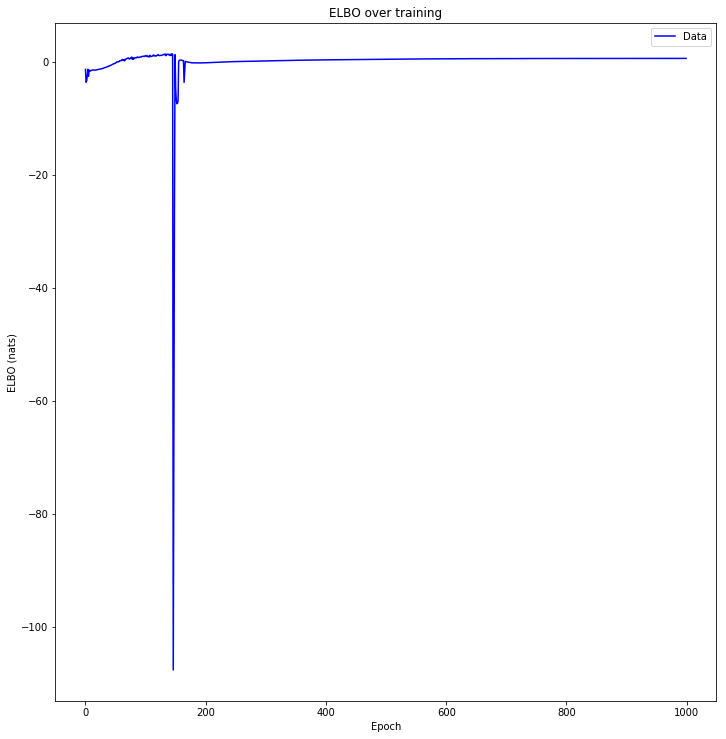

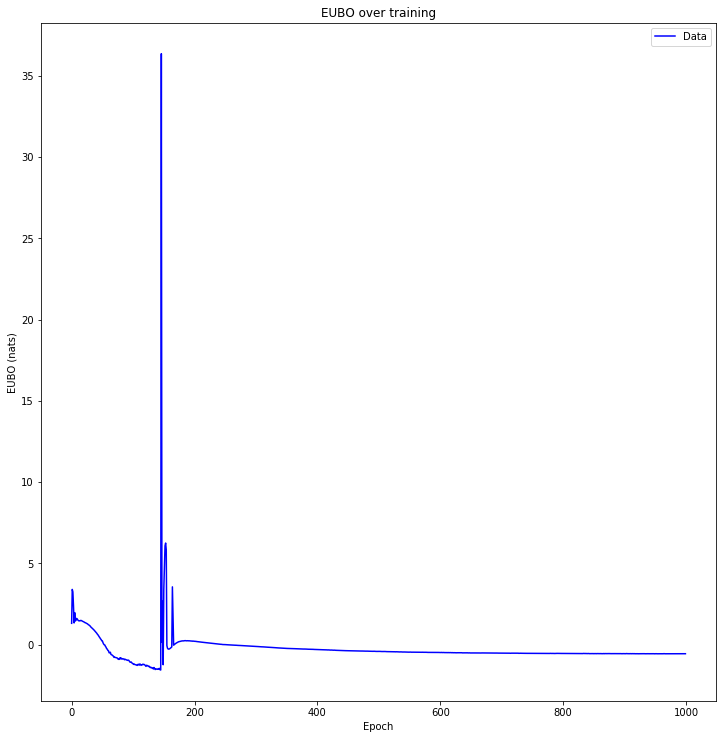

In [11]:
inference, trained_params, (elbos, eubos) = importance.variational_importance(
    agent, 1000, {},
    use_cuda=False, lr=1e-1, bound='elbo',
    patience=100,
)
utils.plot_evidence_bounds(elbos.detach().numpy(), True)
utils.plot_evidence_bounds(eubos.detach().numpy(), False)

In [12]:
trained_params

"{'foraging_success__probs': 'tensor([[-0.6005, -0.5067],\n        [-0.6005, -0.4688],\n        [-0.6005, -0.5883],\n        [-0.6005, -0.4668],\n        [-0.6005, -1.3016],\n        [-0.6005, -0.3006],\n        [-0.6005, -0.2999],\n        [-0.6005, -1.6310],\n        [-0.6005, -0.3541],\n        [-0.6005, -1.7687],\n        [ 1.2135, -0.4253],\n        [-0.6005, -0.3768],\n        [-0.6005, -0.4181],\n        [-0.6005, -0.4332],\n        [-0.6005, -0.2813],\n        [-0.6005, -0.1790],\n        [-0.6005, -0.1634],\n        [-0.6005, -0.3059],\n        [-0.6005, -0.2941],\n        [-0.6005, -0.2785],\n        [-0.6005, -0.5939],\n        [-0.6005, -0.4527],\n        [-0.6005, -0.3146],\n        [-0.6005, -0.3083]], grad_fn=<CloneBackward>)', 'foraging_success__temperature': 'tensor([[ 0.4286,  0.6371],\n        [ 1.3681,  0.1980],\n        [ 0.6214,  0.5262],\n        [ 0.8637,  1.0087],\n        [ 0.8653, 14.3566],\n        [ 1.5591,  0.4948],\n        [ 0.5968,  0.5720],\n        [ 

In [13]:
inference

ComputationGraph{[('FepAgent', Trace{'foraging_success': RelaxedBernoulli([torch.FloatTensor of size 100x24x2]), 'survival_preference': RelaxedBernoulli([torch.FloatTensor of size 100x1]), 'meals': Normal([torch.FloatTensor of size 100x1])})]}

In [14]:
inference['FepAgent']['meals'].value.mean(dim=0)

tensor([3.7409], grad_fn=<MeanBackward0>)